In [38]:
!pip install beautifulsoup4


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import csv
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
from bs4 import BeautifulSoup
import requests  # type: ignore

url = "https://www.trendyol.com/kadin-canta-x-g1-c117"
html = requests.get(url).text

soup = BeautifulSoup(html, 'lxml')


In [6]:

product_list = []

# Tüm sayfalar için döngü (pi=1'den pi=20'ye kadar)
for page in range(1, 201):  # 1'den 20'ye kadar sayfaları dolaş
    url = f"https://www.trendyol.com/kadin-canta-x-g1-c117?pi={page}"
    response = requests.get(url)  # Sayfayı çek
    soup = BeautifulSoup(response.content, 'html.parser')  # HTML içeriğini çözümle


    # Sayfadaki tüm ürünleri bul
    for product_item in soup.find_all(class_='p-card-wrppr'):
        # Ürün açıklamasını ve fiyatını çıkar
        product_aciklama_element = product_item.find(class_='prdct-desc-cntnr-name')
        product_aciklama = product_aciklama_element.text.strip() if product_aciklama_element else None

        # Puan öğesi mevcutsa, metnine erişmeden önce kontrol et ve puanı doğru formatta ayarla
        product_puan_element = product_item.find(class_='rating-score')
        product_puan = product_puan_element.text.strip() if product_puan_element else None


        # Marka öğesi mevcutsa, metnine erişmeden önce kontrol et
        product_marka_element = product_item.find(class_='prdct-desc-cntnr-ttl')
        product_marka = product_marka_element.text.strip() if product_marka_element else None

        # Fiyat öğesi mevcutsa, metnine erişmeden önce kontrol et
        product_fiyat_element = product_item.find(class_='prc-box-dscntd')
        product_fiyat = product_fiyat_element.text.strip() if product_fiyat_element else None


        product_kargo_element = product_item.find(class_='product-stamp-container freeCargo')
        product_kargo = product_kargo_element.text.strip() if product_kargo_element else None



        product_yorums_element = product_item.find(class_='ratingCount')
        product_yorums = product_yorums_element.text.strip() if product_yorums_element else None

        if product_yorums:
            product_yorums = int(product_yorums.strip('()').replace(',', ''))  # Parantezleri kaldır ve virgülü sil # This line was indented by 4 spaces
        else:
            product_yorums = 0


        product_favori_element = product_item.find(class_='focused-text')
        product_favori = product_favori_element.text.strip() if product_favori_element else None

        # Ürün listesini güncelle
        product_list.append({"açıklama": product_aciklama, "fiyat": product_fiyat, "puan": product_puan, "marka": product_marka, "favori": product_favori, "yorum sayısı": product_yorums, "kargo":product_kargo})

    # Her istekten sonra 2 saniye bekle
    time.sleep(2)

# Sonuçları yazdır
for i, product in enumerate(product_list):
    if i == 5:  # 5 satır yazdırdıktan sonra döngüyü sonlandır
        break
    print(product)


{'açıklama': 'Kadın Siyah 3', 'fiyat': '375,99 TL', 'puan': None, 'marka': 'HAKGROSS', 'favori': '5008 kişi', 'yorum sayısı': 0, 'kargo': 'Kargo Bedava'}
{'açıklama': 'Kadın Siyah 3', 'fiyat': '419,99 TL', 'puan': '3.0', 'marka': 'HAKGROSS', 'favori': '16.7B kişi', 'yorum sayısı': 78, 'kargo': 'Kargo Bedava'}
{'açıklama': 'Name Model El', 'fiyat': '553 TL', 'puan': None, 'marka': 'Mia Collection', 'favori': '222 kişi', 'yorum sayısı': 0, 'kargo': 'Kargo Bedava'}
{'açıklama': 'Siyah Shk108 Çıtçıtlı', 'fiyat': '321,55 TL', 'puan': '4.6', 'marka': 'Shaka', 'favori': '500+ ürün', 'yorum sayısı': 12196, 'kargo': 'Kargo Bedava'}
{'açıklama': 'Mini çapraz', 'fiyat': '470 TL', 'puan': '4.5', 'marka': 'Stradivarius', 'favori': '100+ ürün', 'yorum sayısı': 121, 'kargo': None}


In [39]:
print(len(product_list))

4800


In [40]:

with open('list.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["açıklama", "fiyat", "puan", "marka", "favori", "yorum sayısı","kargo"])
    writer.writeheader()  # Başlıkları yaz
    writer.writerows(product_list)  # Ürünleri yaz

print("Veriler 'list.csv' dosyasına kaydedildi.")

Veriler 'list.csv' dosyasına kaydedildi.


In [41]:

cleaned_product_list = []

for product in product_list:
    if product["fiyat"] is not None:  # Fiyat bilgisi olmayanları atla

        # Yorum sayısı, puan ve favori bilgisi olmayanlara 0 atama
        if product["puan"] is None:
            product["puan"] = 0
        if product["yorum sayısı"] is None:
            product["yorum sayısı"] = 0
        if product["favori"] is None:
            product["favori"] = 0


        # Temizlenmiş listeye ekle
        cleaned_product_list.append(product)

# Temizlenmiş verileri CSV dosyasına kaydetme
with open('list.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["açıklama", "fiyat", "puan", "marka", "favori", "yorum sayısı","kargo"])  # Kargo'yu kaldırdım
    writer.writeheader()  # Başlıkları yaz
    writer.writerows(cleaned_product_list)  # Temizlenmiş ürünleri yaz

print("Veriler 'list.csv' dosyasına kaydedildi.")


Veriler 'list.csv' dosyasına kaydedildi.


In [42]:

cleaned_product_list = []


for product in product_list:
    # Fiyatı kontrol et ve temizle
    if product["fiyat"]:
        if isinstance(product["fiyat"], str):  # Eğer fiyat string ise temizle
            # "TL" ifadesini kaldır, ardından binlik ayrımı noktalarını ve ondalık ayrımı düzelt
            cleaned_fiyat = product["fiyat"].replace(" TL", "").replace(".", "").replace(",", ".")
            try:
                product["fiyat"] = float(cleaned_fiyat)  # Temizlenen fiyatı float'a çevir
            except ValueError:
                product["fiyat"] = None  # Fiyat dönüştürülemezse None olarak kaydet
    else:
        continue  # Fiyat bilgisi yoksa bu ürünü atla

    # Favori sayısını kontrol et ve temizle
    if product["favori"]:
        if isinstance(product["favori"], str):  # Eğer favori string ise temizle
            try:
                # Sadece sayısal kısımları al
                cleaned_favori = "".join(filter(str.isdigit, product["favori"]))
                product["favori"] = int(cleaned_favori) if cleaned_favori else 0
            except ValueError:
                product["favori"] = 0  # Favori dönüştürülemezse 0 olarak ayarla
    else:
        product["favori"] = 0

    # Kargo (shipping) kontrol et ve temizle
    if product["kargo"]:
        if isinstance(product["kargo"], str):  # Eğer kargo string ise kontrol et
            if "bedava" in product["kargo"].lower():
                product["kargo"] = 1  # Kargo bedava ise "bedava" olarak ayarla
            else:
                product["kargo"] = 0  # Diğer durumda 0 olarak ayarla
    else:
        product["kargo"] = 0  # Kargo bilgisi yoksa 0 olarak ayarla

    cleaned_product_list.append(product)

# list verileri yeni bir CSV dosyasına kaydetme
with open('new.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["açıklama", "fiyat", "puan", "marka", "favori", "yorum sayısı", "kargo"])
    writer.writeheader()
    writer.writerows(cleaned_product_list)

print("list veriler 'new.csv' dosyasına kaydedildi.")




list veriler 'new.csv' dosyasına kaydedildi.


In [43]:
df1 = pd.read_csv("new.csv")

In [44]:
df1.shape

(4583, 7)

In [45]:
df1.columns

Index(['açıklama', 'fiyat', 'puan', 'marka', 'favori', 'yorum sayısı',
       'kargo'],
      dtype='object')

In [46]:
df1['marka'].unique()

array(['HAKGROSS', 'Mia Collection', 'Shaka', 'Stradivarius', 'EMN',
       'FASHION', 'Katusa', 'Pierre Cardin', 'Genel Markalar', 'woys',
       'neroverde', 'ESTUTE', 'Woys Bags', 'Cochines', 'AngelBags',
       'NİSSEA', 'Sowa Collection', 'Mercan', 'Housebags', 'BAGLOVİS',
       'Frank Martin', 'Yuka Atelier', 'Pull & Bear', 'NBİBAGS',
       'NWR BAGS', 'Modabag', 'bag&more', 'Rimense', 'Modstore',
       'Adelina Bags', 'Night', 'Mavi', 'Tonny Black', 'vagues', 'BAHELS',
       'YUNUSOĞLU HOME', 'HAPBUY', 'macharelbasic', 'İAMBTŞY',
       'Calvin Klein', 'Straada accessories', 'BOHEMIAN BOUTIQUE',
       'Shule Bags', 'DENSİLA', 'ALTUNAY', 'CKN', 'Lucky Bees',
       'Çantacımstore', 'YMZBAG', 'mıchael polo', 'AVİADA', 'Armine',
       'Newish', 'Madamra', 'MAC&MOS', 'lilienbag', 'Universal',
       'macharel jeans', 'MODA ELF', 'BAMBLOU', 'LUNABLU', 'Tina',
       'Oysho', 'Lukas', 'Kaya Bag', 'samilon', 'Kontes', 'MATMAZELL',
       'minebag', 'Qulaccia', 'Cream', 'Pelin Bou

In [47]:
df1['marka'].value_counts()

,count
marka,
Pierre Cardin,549
neroverde,400
Mia Collection,356
EMN,200
HAPBUY,197
...,...
Bella Maison,1
shoecide,1
Whice,1


In [48]:
df2 = df1.drop(['açıklama'], axis='columns')

In [49]:
df2.head()

,fiyat,puan,marka,favori,yorum sayısı,kargo
0,375.99,0.0,HAKGROSS,5008,0,1
1,419.99,3.0,HAKGROSS,167,78,1
2,553.00,0.0,Mia Collection,222,0,1
3,321.55,4.6,Shaka,500,12196,1
4,470.00,4.5,Stradivarius,100,121,0


In [50]:
df2.shape

(4583, 6)

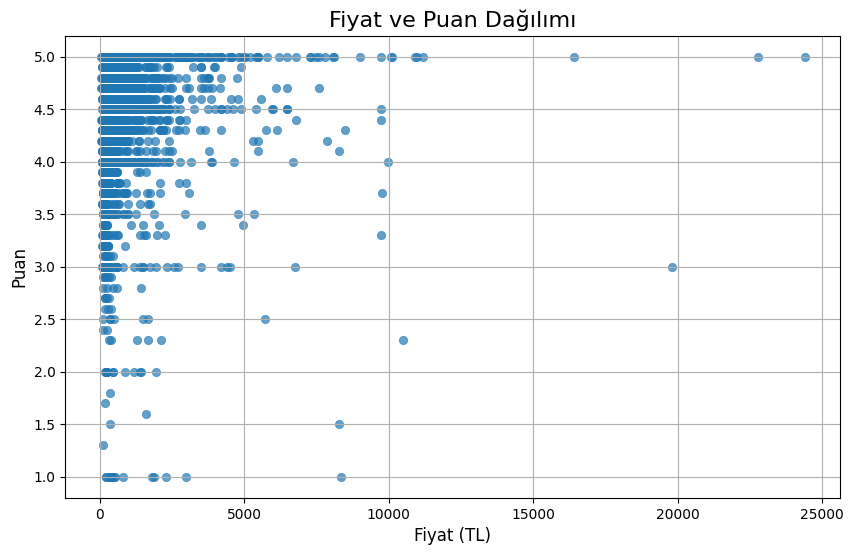

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CSV dosyasını okuyarak pandas DataFrame'e yükleyin
df3 = pd.read_csv('new.csv')

# Fiyat ve puan değerlerini kontrol edin ve eksik veya geçersiz olanları çıkarın
df3 = df3.dropna(subset=["fiyat", "puan"])  # Eksik değerleri çıkar
df3 = df3[(df3["fiyat"] > 0) & (df3["puan"] > 0)]  # Geçersiz (negatif veya 0) değerleri çıkar

# Dağılım grafiği çizimi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x="fiyat", y="puan", alpha=0.7, edgecolor=None)

# Grafik detayları
plt.title("Fiyat ve Puan Dağılımı", fontsize=16)
plt.xlabel("Fiyat (TL)", fontsize=12)
plt.ylabel("Puan", fontsize=12)
plt.grid(True)
plt.show()



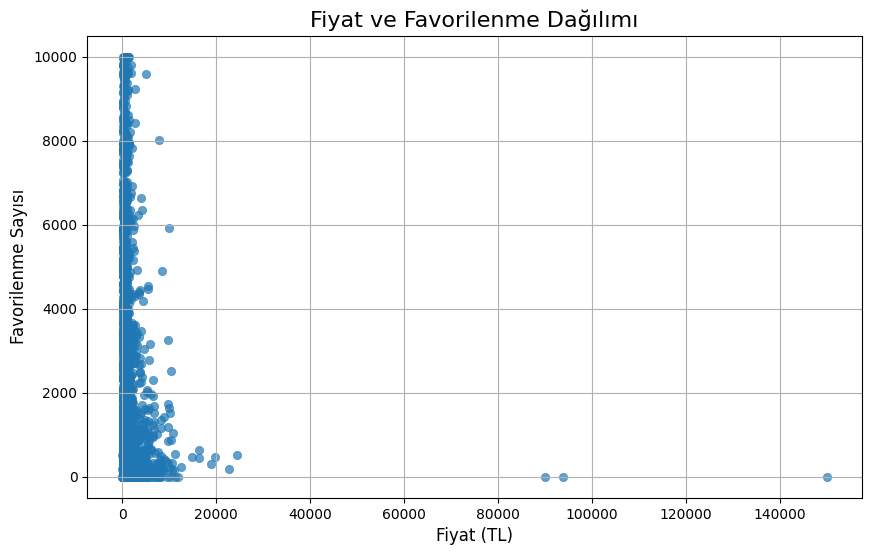

In [52]:

# CSV dosyasını okuyarak pandas DataFrame'e yükleyin
df4 = pd.read_csv('new.csv')

# Fiyat ve favori değerlerini kontrol edin ve eksik veya geçersiz olanları çıkarın
df4 = df4.dropna(subset=["fiyat", "favori"])  # Eksik değerleri çıkar
df4 = df4[(df4["fiyat"] > 0) & (df4["favori"] >= 0)]  # Geçersiz (negatif fiyatları veya favorileri çıkar)

# Dağılım grafiği çizimi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x="fiyat", y="favori", alpha=0.7, edgecolor=None)

# Grafik detayları
plt.title("Fiyat ve Favorilenme Dağılımı", fontsize=16)
plt.xlabel("Fiyat (TL)", fontsize=12)
plt.ylabel("Favorilenme Sayısı", fontsize=12)
plt.grid(True)
plt.show()



In [53]:


# Mevcut new.csv dosyasını yükle
file_path = 'new.csv'
df = pd.read_csv(file_path)

# Marka bilgisini sayısal hale getirme
label_encoder = LabelEncoder()
df['marka_encoded'] = label_encoder.fit_transform(df['marka'])

# Markaların frekansını hesaplama ve 10'dan az olanları filtreleme
marka_counts = df['marka'].value_counts()
df = df[df['marka'].isin(marka_counts[marka_counts >= 10].index)]

# Orijinal 'marka' sütununu kaldırma
df = df.drop(columns=['marka'])

# Güncellenmiş DataFrame'i yeni bir dosyaya kaydetme
end = 'end.csv'
df.to_csv(end, index=False, encoding='utf-8')

print(f"Değişiklikler yeni dosya '{end}' olarak kaydedildi.")


Değişiklikler yeni dosya 'end.csv' olarak kaydedildi.


               marka_encoded      puan  yorum sayısı     fiyat    favori  \
marka_encoded       1.000000  0.314932      0.058801 -0.062606  0.029761   
puan                0.314932  1.000000      0.086381  0.086669  0.221920   
yorum sayısı        0.058801  0.086381      1.000000 -0.072511 -0.071920   
fiyat              -0.062606  0.086669     -0.072511  1.000000  0.104522   
favori              0.029761  0.221920     -0.071920  0.104522  1.000000   
kargo              -0.016835  0.021410     -0.026273  0.087495 -0.186092   

                  kargo  
marka_encoded -0.016835  
puan           0.021410  
yorum sayısı  -0.026273  
fiyat          0.087495  
favori        -0.186092  
kargo          1.000000  


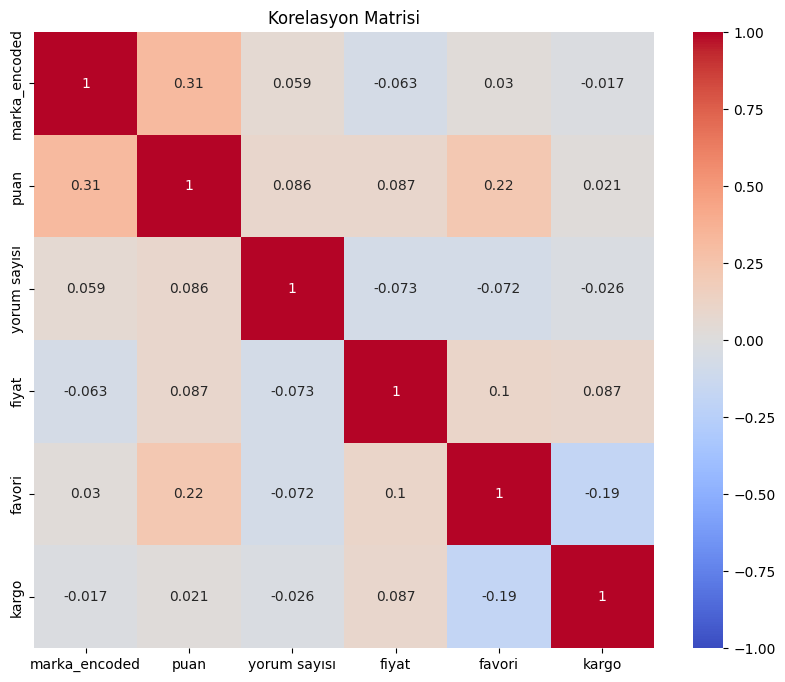

In [54]:
# Sayısal değişkenler arasındaki korelasyonları hesapla
korelasyon_matrisi = df[['marka_encoded', 'puan', 'yorum sayısı', 'fiyat', 'favori', 'kargo']].corr()  # Only include numerical columns
print(korelasyon_matrisi)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.svm import SVR

In [56]:

# Veriyi yükleme
file_path = 'end.csv'
df = pd.read_csv(file_path)

# Gerekli sütunları seçme ve eksik değerleri kontrol etme
df = df[["marka_encoded", "puan", "fiyat"]].dropna()

# Fiyatı sayısal hale getirme
df["fiyat"] = df["fiyat"].replace(" TL", "", regex=True).replace(".", "", regex=True).replace(",", ".", regex=True).astype(float)

# Bağımsız ve bağımlı değişkenleri ayırma
X = df[["marka_encoded", "puan"]]
y = df["fiyat"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [57]:
# Random Forest modelini oluşturma
rf_model = RandomForestRegressor(random_state=42)

# Hiperparametreler için parametre arama uzayını tanımlama
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV kullanarak hiperparametre optimizasyonu
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Modeli eğitme
random_search.fit(X_train_scaled, y_train)

# En iyi model parametreleri
best_rf_model = random_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred = best_rf_model.predict(X_test_scaled)

# Performans metriklerini hesaplama
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Sonuçları yazdırma
print("Random Forest Model Performansı:")
print(f"Ortalama Mutlak Hata (MAE): {mae_rf:.2f} ")
print(f"Ortalama Karesel Hata (MSE): {mse_rf:.2f} ")
print(f"R-Kare (R²): {r2_rf:.2f}")

# Ortalama Mutlak Yüzdelik Hata (MAPE)
mape_rf = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Ortalama Mutlak Yüzdelik Hata (MAPE): {mape_rf:.2f}%")


# Örnek tahmin sonuçlarını yazdırma
print("\nTahmin Edilen ve Gerçek Fiyatlar:")
comparison = pd.DataFrame({'Gerçek Fiyat': y_test, 'Tahmin Edilen Fiyat': y_pred})
print(comparison.head())


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Random Forest Model Performansı:
Ortalama Mutlak Hata (MAE): 161.98 
Ortalama Karesel Hata (MSE): 153705.29 
R-Kare (R²): 0.83
Ortalama Mutlak Yüzdelik Hata (MAPE): 23.02%

Tahmin Edilen ve Gerçek Fiyatlar:
      Gerçek Fiyat  Tahmin Edilen Fiyat
1775        399.00           399.000000
51          299.00           403.086516
194         124.99           174.409631
2755        115.32           115.320000
2019        123.00           246.369062


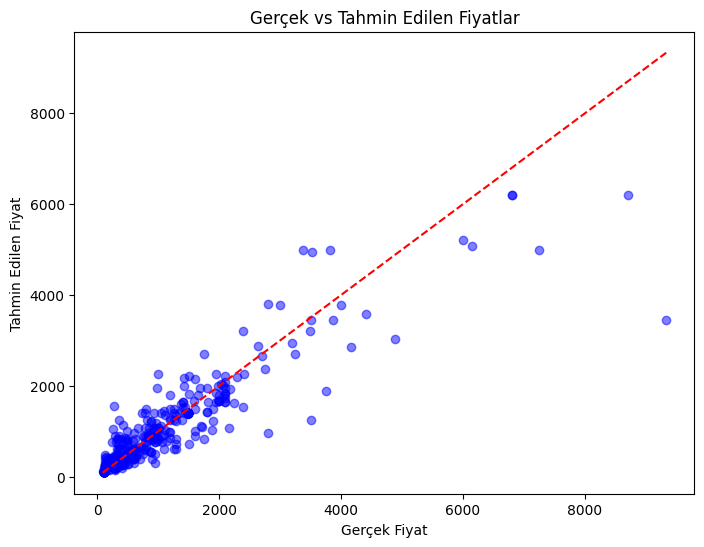

In [58]:
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)



# Gerçek ve tahmin edilen değerleri karşılaştıran grafik
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gerçek vs Tahmin Edilen Fiyatlar')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.show()

In [59]:


# Gradient Boosting modelini oluşturma ve eğitme
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred = gb_model.predict(X_test_scaled)

# Hata oranlarını hesaplama
mae_gb = mean_absolute_error(y_test, y_pred)
mse_gb = mean_squared_error(y_test, y_pred)
rmse = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred)

# Yüzdelik hata oranlarını hesaplama
mape_gb = (abs((y_test - y_pred) / y_test).mean()) * 100

# Sonuçları yazdırma
print("Gradient Boosting Regressor ile Fiyat Tahmini")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2_gb:.2f}") # Now using the correct variable name
print(f"Mean Absolute Percentage Error (MAPE): {mape_gb:.2f}%")

# Tahmin sonuçlarını ve gerçek değerleri bir arada gösterme
results = pd.DataFrame({
    "Gerçek Fiyat": y_test.values,
    "Tahmin Edilen Fiyat": y_pred
})

print("\nİlk 10 Tahmin Sonucu:")
print(results.head(10))


Gradient Boosting Regressor ile Fiyat Tahmini
Mean Absolute Error (MAE): 236.49
Mean Squared Error (MSE): 229828.82
Root Mean Squared Error (RMSE): 479.40
R² Score: 0.75
Mean Absolute Percentage Error (MAPE): 43.04%

İlk 10 Tahmin Sonucu:
   Gerçek Fiyat  Tahmin Edilen Fiyat
0        399.00           431.403083
1        299.00           430.301339
2        124.99           428.493139
3        115.32           183.723797
4        123.00           557.296233
5        749.90           767.591700
6       2299.00          1321.716256
7        230.00           352.718298
8        189.90           378.220260
9        250.00           536.732677


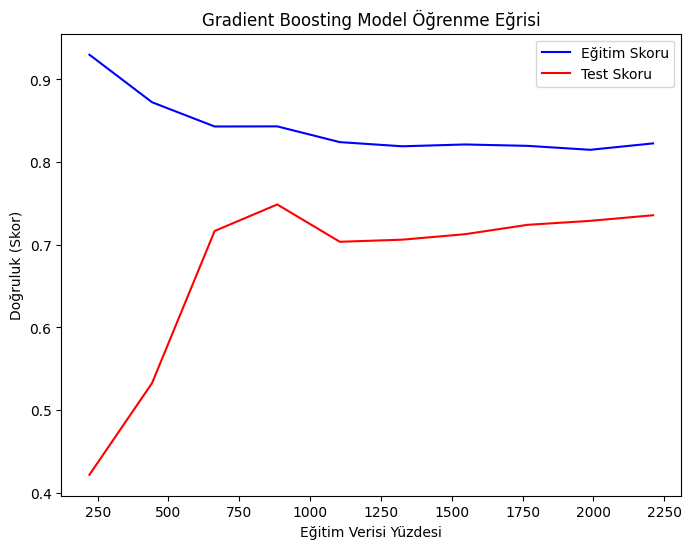

In [60]:


# Öğrenme eğrisini hesaplama
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

# Eğitim ve test skorlarını hesaplama
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Öğrenme eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Eğitim Skoru', color='blue')
plt.plot(train_sizes, test_mean, label='Test Skoru', color='red')
plt.title('Gradient Boosting Model Öğrenme Eğrisi')
plt.xlabel('Eğitim Verisi Yüzdesi')
plt.ylabel('Doğruluk (Skor)')
plt.legend()
plt.show()



In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
import pandas as pd

# Veriyi yükleme
file_path = 'end.csv'
df = pd.read_csv(file_path)

# Gerekli sütunları seçme ve eksik değerleri kontrol etme
df = df[["marka_encoded", "puan", "fiyat"]].dropna()

# Fiyat kategorilerini oluşturma (5 sınıf)
df['fiyat_sınıf'] = pd.cut(df['fiyat'],
    bins=[0, df['fiyat'].quantile(0.2), df['fiyat'].quantile(0.4),
          df['fiyat'].quantile(0.6), df['fiyat'].quantile(0.8), df['fiyat'].max()],
    labels=['Çok Düşük', 'Düşük', 'Orta', 'Pahalı', 'Çok Pahalı']
)

# Kategorik değişkeni sayısal hale getirme
df['fiyat_sınıf_kod'] = df['fiyat_sınıf'].cat.codes

# Bağımsız ve bağımlı değişkenleri ayırma
X = df[["marka_encoded", "puan"]]
y = df["fiyat_sınıf_kod"]  # Sayısal hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier modelini oluşturma ve eğitme
rfg_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rfg_model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred = rfg_model.predict(X_test_scaled)

# Sınıflandırma metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Regresyon metriklerini hesaplama
mae_rfg = mean_absolute_error(y_test, y_pred)
mse_rfg = mean_squared_error(y_test, y_pred)
r2_rfg = r2_score(y_test, y_pred)
y_test_nonzero = y_test.replace(0, np.nan)  # Sıfırları NaN ile değiştir
mape_rfg = np.mean(np.abs((y_test_nonzero - y_pred) / y_test_nonzero)) * 100

# Sonuçları yazdırma
print("Random Forest Model Performansı:")
print(f"Ortalama Mutlak Yüzdelik Hata (MAPE): {mape_rfg:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Ortalama Mutlak Hata (MAE): {mae_rfg:.2f}")
print(f"Ortalama Karesel Hata (MSE): {mse_rfg:.2f}")
print(f"R-Kare (R²): {r2_rfg:.2f}")

# Tahmin sonuçlarını ve gerçek sınıfları bir arada gösterme
results = pd.DataFrame({
    "Gerçek Fiyat Sınıfı (Kod)": y_test.values,
    "Tahmin Edilen Fiyat Sınıfı (Kod)": y_pred
})
print("\nİlk 10 Tahmin Sonucu:")
print(results.head(10).to_string(index=False))


Random Forest Model Performansı:
Ortalama Mutlak Yüzdelik Hata (MAPE): 21.47%
Confusion Matrix:
[[128   9  43   4   3]
 [ 24  87   6   8   4]
 [  6   6  97   8   4]
 [ 10   8   8  88  14]
 [  4   4   1  13 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       187
           1       0.76      0.67      0.72       129
           2       0.63      0.80      0.70       121
           3       0.73      0.69      0.71       128
           4       0.81      0.83      0.82       127

    accuracy                           0.73       692
   macro avg       0.73      0.73      0.73       692
weighted avg       0.74      0.73      0.73       692

Ortalama Mutlak Hata (MAE): 0.47
Ortalama Karesel Hata (MSE): 0.98
R-Kare (R²): 0.55

İlk 10 Tahmin Sonucu:
 Gerçek Fiyat Sınıfı (Kod)  Tahmin Edilen Fiyat Sınıfı (Kod)
                         1                                 1
                         0                    

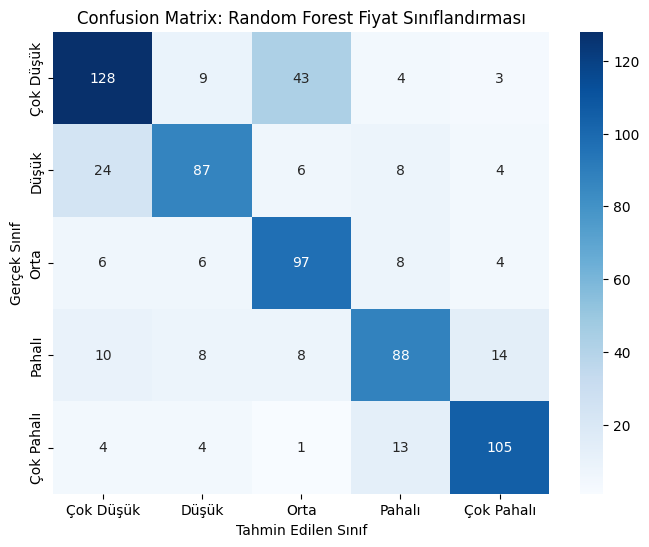

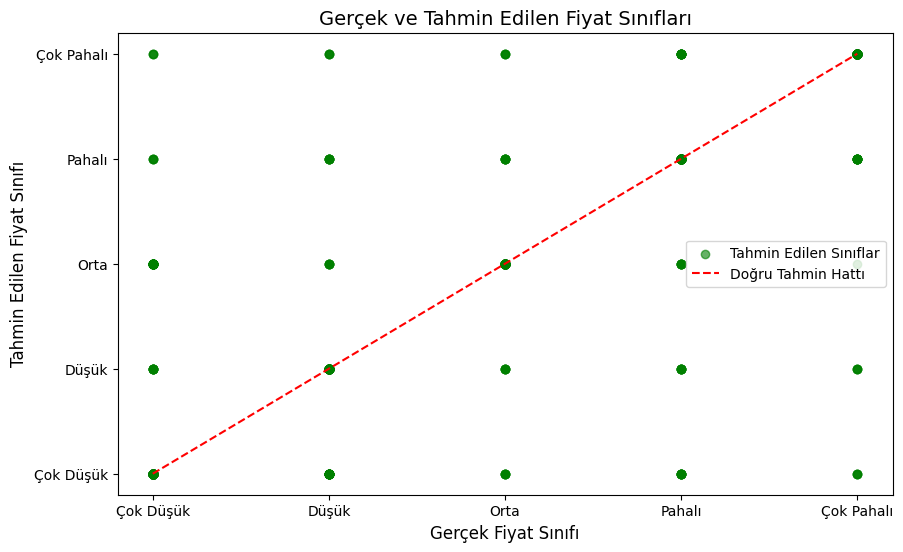

In [62]:
# Confusion Matrix'i görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Çok Düşük', 'Düşük', 'Orta', 'Pahalı', 'Çok Pahalı']  # Yeni etiketler

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: Random Forest Fiyat Sınıflandırması')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# Gerçek sınıflar ve tahmin edilen sınıflar arasındaki ilişkiyi gösterme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Tahmin Edilen Sınıflar', alpha=0.6)
plt.plot([0, len(labels)-1], [0, len(labels)-1], color='red', linestyle='--', label='Doğru Tahmin Hattı')

# Grafik başlıkları ve etiketler
plt.title('Gerçek ve Tahmin Edilen Fiyat Sınıfları', fontsize=14)
plt.xlabel('Gerçek Fiyat Sınıfı', fontsize=12)
plt.ylabel('Tahmin Edilen Fiyat Sınıfı', fontsize=12)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.legend()
plt.show()



In [63]:
file_path = 'end.csv'
df = pd.read_csv(file_path)

df = df[["marka_encoded", "puan", "fiyat"]].dropna()

# 'fiyat' sütununu sayısal hale getirme
df["fiyat"] = df["fiyat"].replace(" TL", "", regex=True).replace(".", "", regex=True).replace(",", ".", regex=True).astype(float)

# Bağımsız ve bağımlı değişkenleri ayırma (fiyat kullanarak)
X = df[["marka_encoded", "puan"]]
y = df["fiyat"]  # Target variable is now 'fiyat'

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN modelini oluşturma ve eğitme
knn_model = KNeighborsRegressor()

# Parametre araması için grid search kullanmak (komşu sayısını optimize etme)
param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametrelerle tahmin yapma
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Hata oranlarını hesaplama
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)  # Calculate RMSE using NumPy
r2_knn = r2_score(y_test, y_pred_knn)

mape_knn = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Sonuçları yazdırma
print("KNN (K-Nearest Neighbors) ile Fiyat Tahmini")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R^2 Skoru: {r2_knn:.2f}")
print(f"Yüzdesel Hata Oranı: {mape_knn:.2f}%")  # Yüzdesel hata oranını yazdırıyoruz

# Fiyat tahminlerini yazdırma
print("\nFiyat Tahminleri ve Gerçek Fiyatlar:")
for true, pred in zip(y_test.head(10), y_pred_knn[:10]):
    print(f"Gerçek Fiyat: {true:.2f}  -  Tahmin Edilen Fiyat: {pred:.2f}")


KNN (K-Nearest Neighbors) ile Fiyat Tahmini
Mean Absolute Error (MAE): 209.47
Mean Squared Error (MSE): 233747.26
Root Mean Squared Error (RMSE): 483.47
R^2 Skoru: 0.75
Yüzdesel Hata Oranı: 99.72%

Fiyat Tahminleri ve Gerçek Fiyatlar:
Gerçek Fiyat: 399.00  -  Tahmin Edilen Fiyat: 399.00
Gerçek Fiyat: 299.00  -  Tahmin Edilen Fiyat: 399.00
Gerçek Fiyat: 124.99  -  Tahmin Edilen Fiyat: 171.49
Gerçek Fiyat: 115.32  -  Tahmin Edilen Fiyat: 115.32
Gerçek Fiyat: 123.00  -  Tahmin Edilen Fiyat: 609.39
Gerçek Fiyat: 749.90  -  Tahmin Edilen Fiyat: 894.41
Gerçek Fiyat: 2299.00  -  Tahmin Edilen Fiyat: 972.01
Gerçek Fiyat: 230.00  -  Tahmin Edilen Fiyat: 199.94
Gerçek Fiyat: 189.90  -  Tahmin Edilen Fiyat: 124.90
Gerçek Fiyat: 250.00  -  Tahmin Edilen Fiyat: 249.99


In [64]:
!pip install scikit-learn

<Figure size 800x600 with 0 Axes>

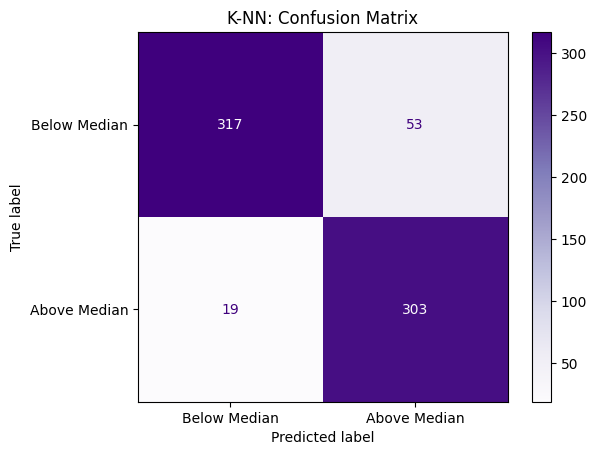

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Binary classification: Median price threshold for KNN predictions
y_test_bin = (y_test > np.median(y_test)).astype(int)  # 1 for above median, 0 for below median
y_pred_knn_bin = (y_pred_knn > np.median(y_test)).astype(int)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_bin, y_pred_knn_bin)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below Median", "Above Median"]).plot(cmap="Purples", values_format="d")
plt.title("K-NN: Confusion Matrix")
plt.show()


In [66]:
!pip install scikit-learn

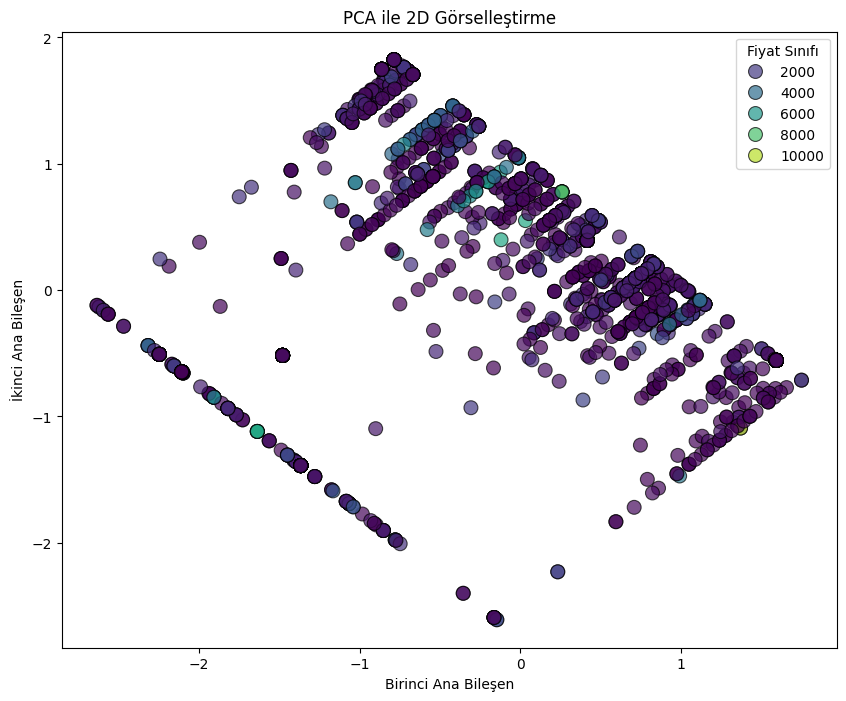

In [67]:
from sklearn.decomposition import PCA  # PCA için gerekli modülü import etme
# PCA işlemi
pca = PCA(n_components=2)  # 2 bileşene indirgeme
X_pca = pca.fit_transform(X_train_scaled)

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="viridis", s=100, edgecolor='k', alpha=0.7)
plt.title("PCA ile 2D Görselleştirme")
plt.xlabel("Birinci Ana Bileşen")
plt.ylabel("İkinci Ana Bileşen")
plt.legend(title="Fiyat Sınıfı", loc='upper right')
plt.show()

<ipython-input-68-939f514fdd7c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=model_results, ax=axes[0, 0], palette="Blues")
<ipython-input-68-939f514fdd7c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=model_results, ax=axes[0, 1], palette="Greens")
<ipython-input-68-939f514fdd7c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=model_results.dropna(subset=["R²"]), ax=axes[1, 0], palette="Reds")
<ipython-input-68-939f514fdd7c>:34: FutureWarning: 

Passing `pa

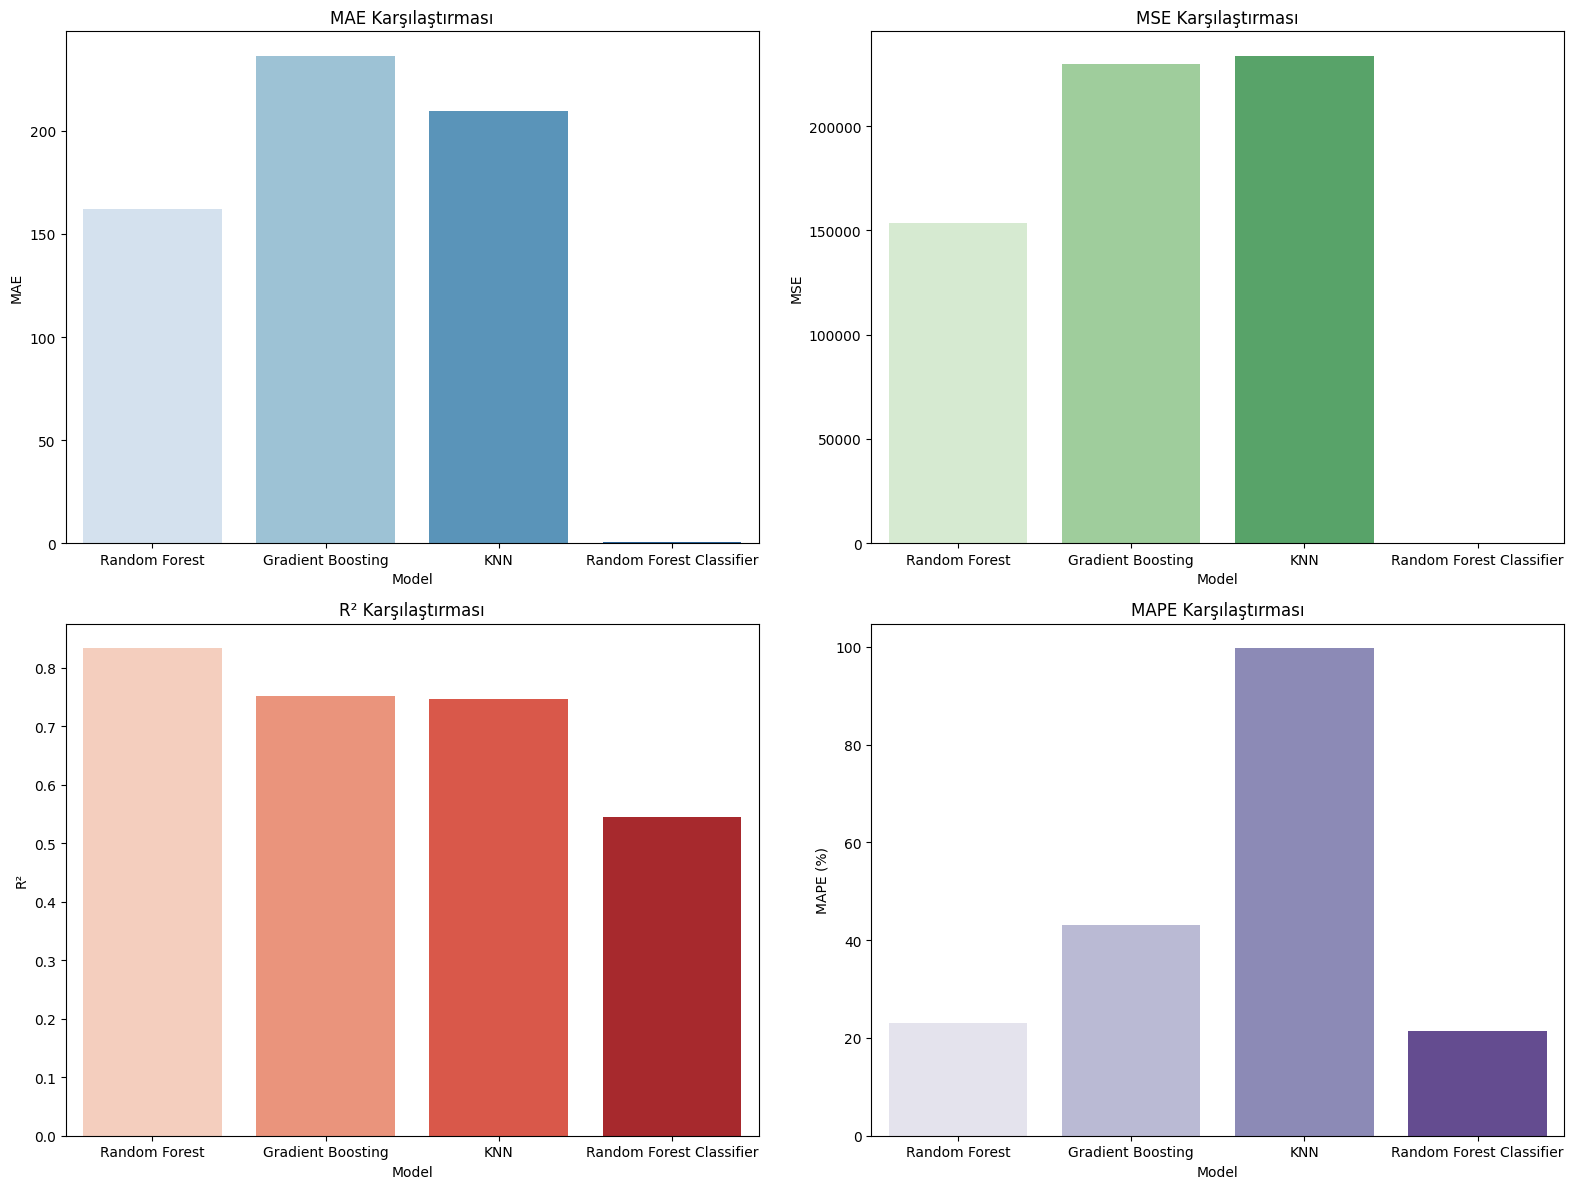

Detaylı Performans Analizi:

Tüm Modellerin Sonuçları:
                      Model         MAE            MSE        R²       Mape
0             Random Forest  161.976254  153705.285885  0.833822  23.017411
1         Gradient Boosting  236.485557  229828.823193  0.751521  43.040599
2                       KNN  209.467731  233747.257326  0.747284  99.716801
3  Random Forest Classifier    0.465318       0.979769  0.545528  21.468647

En İyi Modeller:
- En iyi regresyon modeli (R²'ye göre): Random Forest
- En iyi sınıflandırma modeli (MAPE'ye göre): Random Forest Classifier


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
model_results = pd.DataFrame(columns=["Model", "MAE", "MSE", "R²", "Mape"])
model_results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "KNN", "Random Forest Classifier"],
    "MAE": [mae_rf, mae_gb, mae_knn, mae_rfg],
    "MSE": [mse_rf, mse_gb, mse_knn, mse_rfg],
    "R²": [r2_rf, r2_gb, r2_knn, r2_rfg],
    "Mape": [mape_rf, mape_gb, mape_knn, mape_rfg]
})

# Model performanslarını görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# MAE Karşılaştırması
sns.barplot(x="Model", y="MAE", data=model_results, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("MAE Karşılaştırması")
axes[0, 0].set_ylabel("MAE")
axes[0, 0].set_xlabel("Model")

# MSE Karşılaştırması
sns.barplot(x="Model", y="MSE", data=model_results, ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title("MSE Karşılaştırması")
axes[0, 1].set_ylabel("MSE")
axes[0, 1].set_xlabel("Model")

# R² Karşılaştırması
sns.barplot(x="Model", y="R²", data=model_results.dropna(subset=["R²"]), ax=axes[1, 0], palette="Reds")
axes[1, 0].set_title("R² Karşılaştırması")
axes[1, 0].set_ylabel("R²")
axes[1, 0].set_xlabel("Model")

# MAPE Karşılaştırması
sns.barplot(x="Model", y="Mape", data=model_results.dropna(subset=["Mape"]), ax=axes[1, 1], palette="Purples")
axes[1, 1].set_title("MAPE Karşılaştırması")
axes[1, 1].set_ylabel("MAPE (%)")
axes[1, 1].set_xlabel("Model")

# Grafik ayarları
plt.tight_layout()
plt.show()

# En iyi modelleri öne çıkaran yazılar
print("Detaylı Performans Analizi:")
print("\nTüm Modellerin Sonuçları:")
print(model_results)
best_regression_model = model_results.loc[model_results["R²"].idxmax(), "Model"]  # Find model with highest R²
best_classification_model = model_results.loc[model_results["Mape"].idxmin(), "Model"] # Find model with lowest MAPE

print("\nEn İyi Modeller:")
print(f"- En iyi regresyon modeli (R²'ye göre): {best_regression_model}")
print(f"- En iyi sınıflandırma modeli (MAPE'ye göre): {best_classification_model}")
